# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 50% 50%;background-size: 200% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Introduction</span></b> </div>

In an increasingly connected world, telecommunications companies play a vital role in people's lives. However, competition is fierce and retaining customers has become a difficult task. Churn or customer abandonment is a common problem in the industry, and can be costly for the company in terms of lost revenue and reputation. Therefore, it is crucial for telecommunications companies to identify customers who are at risk of leaving and take proactive measures to keep them satisfied. In this project, machine learning techniques will be used to predict churn and help companies retain their customers.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.impute import SimpleImputer
%matplotlib inline

In [5]:
## Pandas
## Numpy
## Seaborn
## Warnings
## Plotly
## SKlearn
## Matplotlib

<div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 100% 50%;background-size: 150% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Data Preprocessing</span></b> </div>

In [6]:
# data preparation
missing_value = ["N/a", "na", np.nan]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',
                 na_values=missing_value)
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

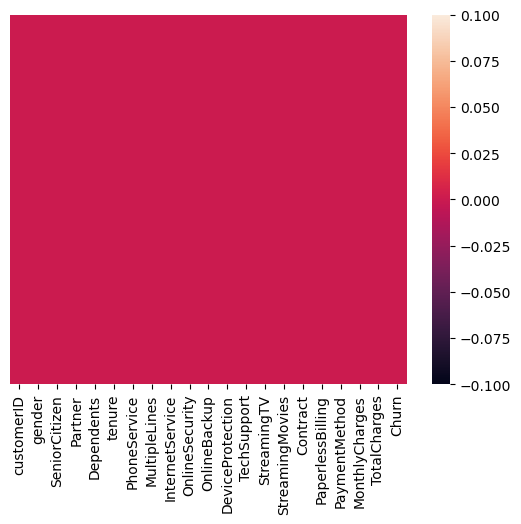

In [8]:
sns.heatmap(df.isnull(), yticklabels=False)

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<li> The Data is ready for analysis
</div>

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 100% 50%;background-size: 150% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Churn Analysis</span></b> </div>

In [9]:
df.head(60)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
df.tail(60)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6983,6633-SYEUS,Female,0,No,No,23,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),83.20,2032.3,No
6984,6447-GORXK,Male,0,No,Yes,31,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),25.00,789.2,No
6985,6967-PEJLL,Male,0,Yes,Yes,37,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,Yes,Electronic check,40.20,1525.35,No
6986,3976-BWUCK,Female,0,Yes,No,30,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),94.10,2804.45,Yes
6987,5981-ZVXOT,Female,1,No,No,35,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,108.35,3726.15,No
6988,1684-FLBGS,Female,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1652.1,No
6989,1389-WNUIB,Female,0,Yes,Yes,20,Yes,Yes,DSL,Yes,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),76.00,1588.75,No
6990,0376-OIWME,Male,0,Yes,No,36,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.60,3366.05,No
6991,3585-ISXZP,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),95.65,778.1,Yes
6992,0218-QNVAS,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),100.55,7113.75,No


In [11]:
df.shape

(7043, 21)

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

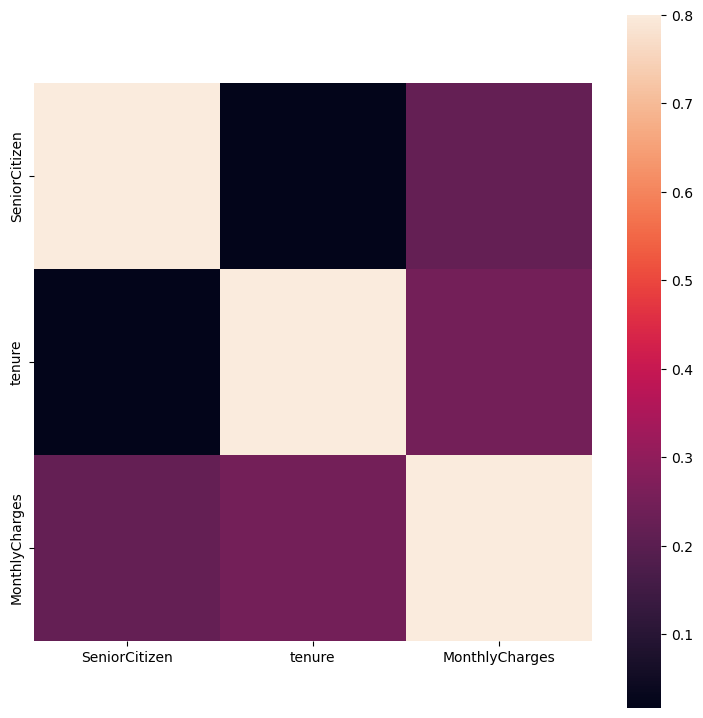

In [14]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


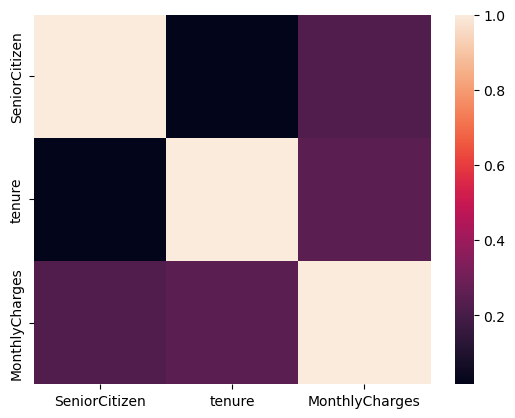

<Figure size 2000x1600 with 0 Axes>

In [15]:
sns.heatmap(df.corr())
plt.figure(figsize=(20, 16))
df.corr()

<AxesSubplot:>

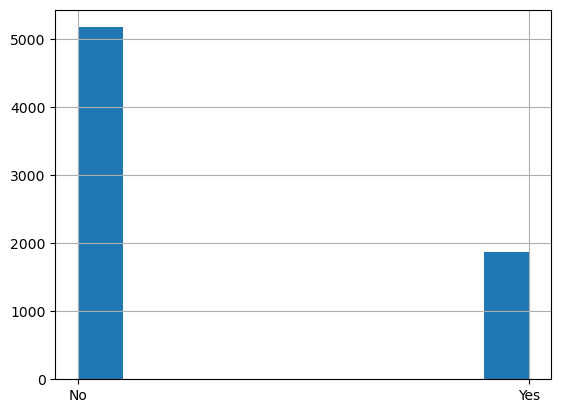

In [16]:
df.Churn.hist()

<AxesSubplot:xlabel='gender', ylabel='count'>

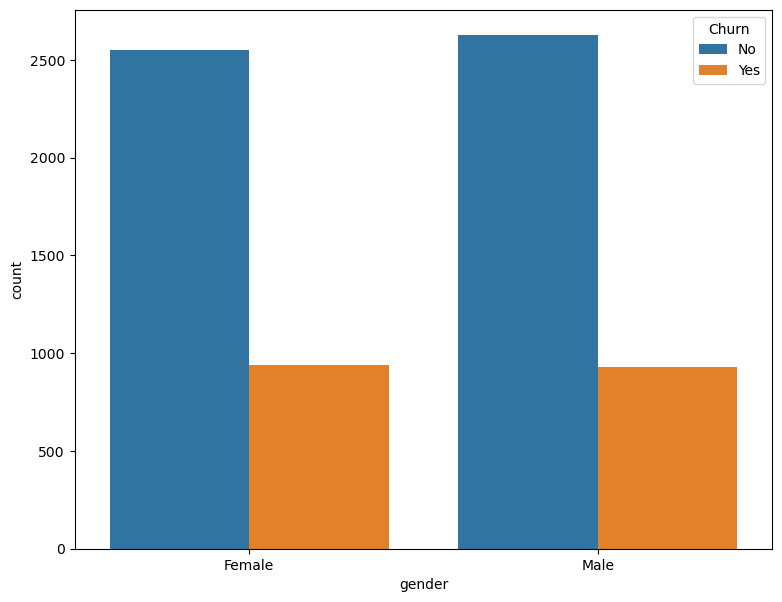

In [17]:
#Churned clients by gender
fig = plt.figure(figsize=(9, 7))
sns.countplot(x='gender', hue='Churn', data=df)

In [18]:
dfgenderFNoChurn=df.loc[(df["gender"]=='Female') & (df['Churn']=='No')]

In [19]:
genderFNoChurn=dfgenderFNoChurn.shape[0]

In [20]:
genderFNoChurn

2549

In [21]:
dfgenderFChurn=df.loc[(df["gender"]=='Female') & (df['Churn']=='Yes')]

In [22]:
genderFChurn=dfgenderFChurn.shape[0]

In [23]:
genderFChurn

939

In [24]:
sumgenderF = genderFNoChurn+genderFChurn

In [25]:
sumgenderF

3488

In [26]:
genderFMean = genderFNoChurn/ (sumgenderF)*100

In [27]:
genderFMean

73.07912844036697

In [28]:
dfgenderMaleNoChurn=df.loc[(df["gender"]=='Male') & (df['Churn']=='No')]

In [29]:
genderMaleNoChurn=dfgenderMaleNoChurn.shape[0]

In [30]:
genderMaleNoChurn

2625

In [31]:
dfgenderMChurn=df.loc[(df["gender"]=='Male') & (df['Churn']=='Yes')]

In [32]:
genderMChurn=dfgenderMChurn.shape[0]

In [33]:
genderMChurn

930

In [34]:
sumgenderMale = genderMaleNoChurn+genderMChurn

In [35]:
sumgenderMale

3555

In [36]:
genderMaleMean = genderMaleNoChurn/ (sumgenderMale)*100

In [37]:
genderMaleMean 

73.83966244725738

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Gender Analysis </font></h3>
<li>There are 3,488 women in the sample, of which 2,549 do not churn and 939 do. 
<li>The average number of women who do not churn is 73.08%.
<li>There are 3555 men in the sample, of which 2625 do not churn and 930 do. 
<li>The average male churn rate is 73.83%.
</div>

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

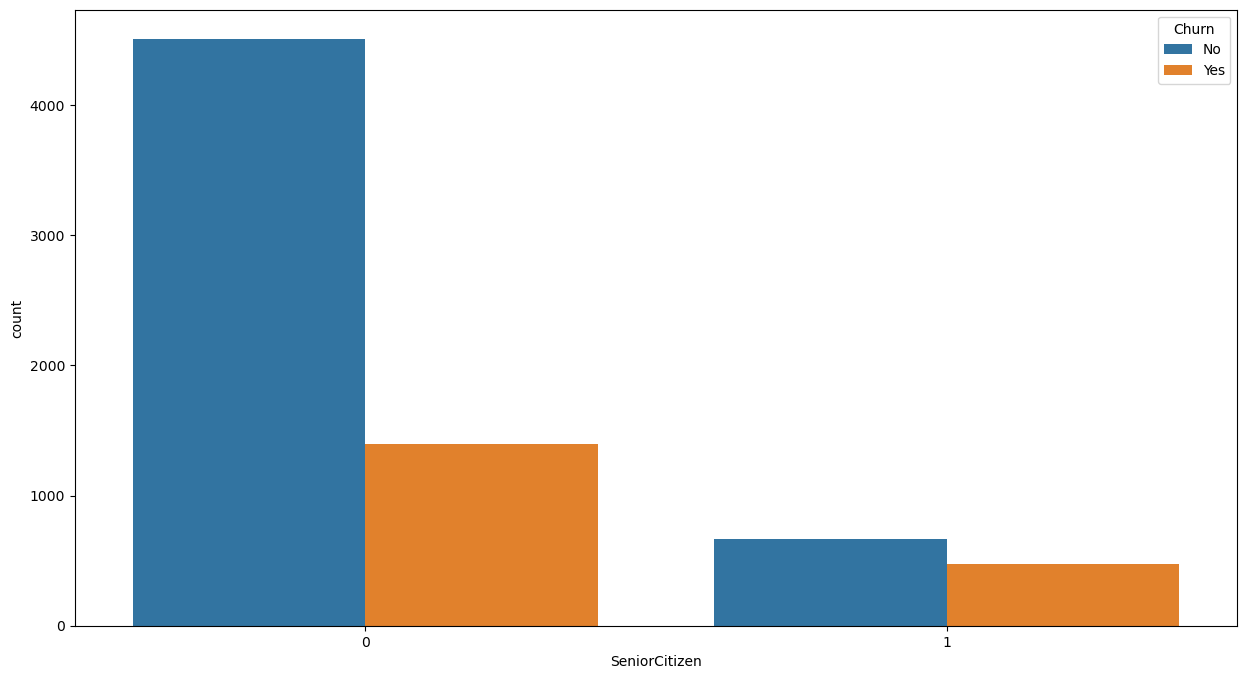

In [38]:
#Churned clients by SeniorCitizen
plt.figure(figsize=(15, 8))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

In [39]:
dfSeniorCitizenNo=df.loc[(df["SeniorCitizen"]==1) & (df['Churn']=='No')]

In [40]:
SeniorCitizenNoChurn=dfSeniorCitizenNo.shape[0]

In [41]:
SeniorCitizenNoChurn

666

In [42]:
dfSeniorCitizenYes=df.loc[(df["SeniorCitizen"]==1) & (df['Churn']=='Yes')]

In [43]:
SeniorCitizenYesChurn=dfSeniorCitizenYes.shape[0]

In [44]:
SeniorCitizenYesChurn

476

In [45]:
sumSeniorCitizen = SeniorCitizenYesChurn+SeniorCitizenNoChurn

In [46]:
sumSeniorCitizen

1142

In [47]:
SeniorCitizenMean = SeniorCitizenNoChurn/ (sumSeniorCitizen)*100

In [48]:
SeniorCitizenMean

58.31873905429072

In [49]:
dfnoSeniorCitizenNo=df.loc[(df["SeniorCitizen"]==0) & (df['Churn']=='No')]

In [50]:
noSeniorCitizenNoChurn=dfnoSeniorCitizenNo.shape[0]


In [51]:
noSeniorCitizenNoChurn

4508

In [52]:
dfnoSeniorCitizenNo=df.loc[(df["SeniorCitizen"]==0) & (df['Churn']=='Yes')]

In [53]:
SeniorCitizenYesChurn=dfnoSeniorCitizenNo.shape[0]

In [54]:
SeniorCitizenYesChurn

1393

In [55]:
sumnonoSeniorCitizen = noSeniorCitizenNoChurn + SeniorCitizenYesChurn

In [56]:
sumnonoSeniorCitizen

5901

In [57]:
noSeniorCitizenMean = noSeniorCitizenNoChurn/ (sumnonoSeniorCitizen)*100

In [58]:
noSeniorCitizenMean

76.3938315539739

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Senior Citizen Analysis</font></h3>
<li>Based on the data provided, it can be observed that the churn rate of customers 
churn rate of non-seniorcitizen clients is lower than that of non-seniorcitizen clients.
seniorcitizen.
<li>Of the 1142 seniorcitizen clients there is an average of 58.31% who do not churn, in contrast to the 5901 non-seniorcitizen clients who do not churn, who have an average of 76.39%. 
<li>This suggests that 
the company could focus its efforts on improving the retention of seniorcitizen customers, as the 
seniorcitizen customers, as they have a higher risk of churn.
</div>

<AxesSubplot:xlabel='Partner', ylabel='count'>

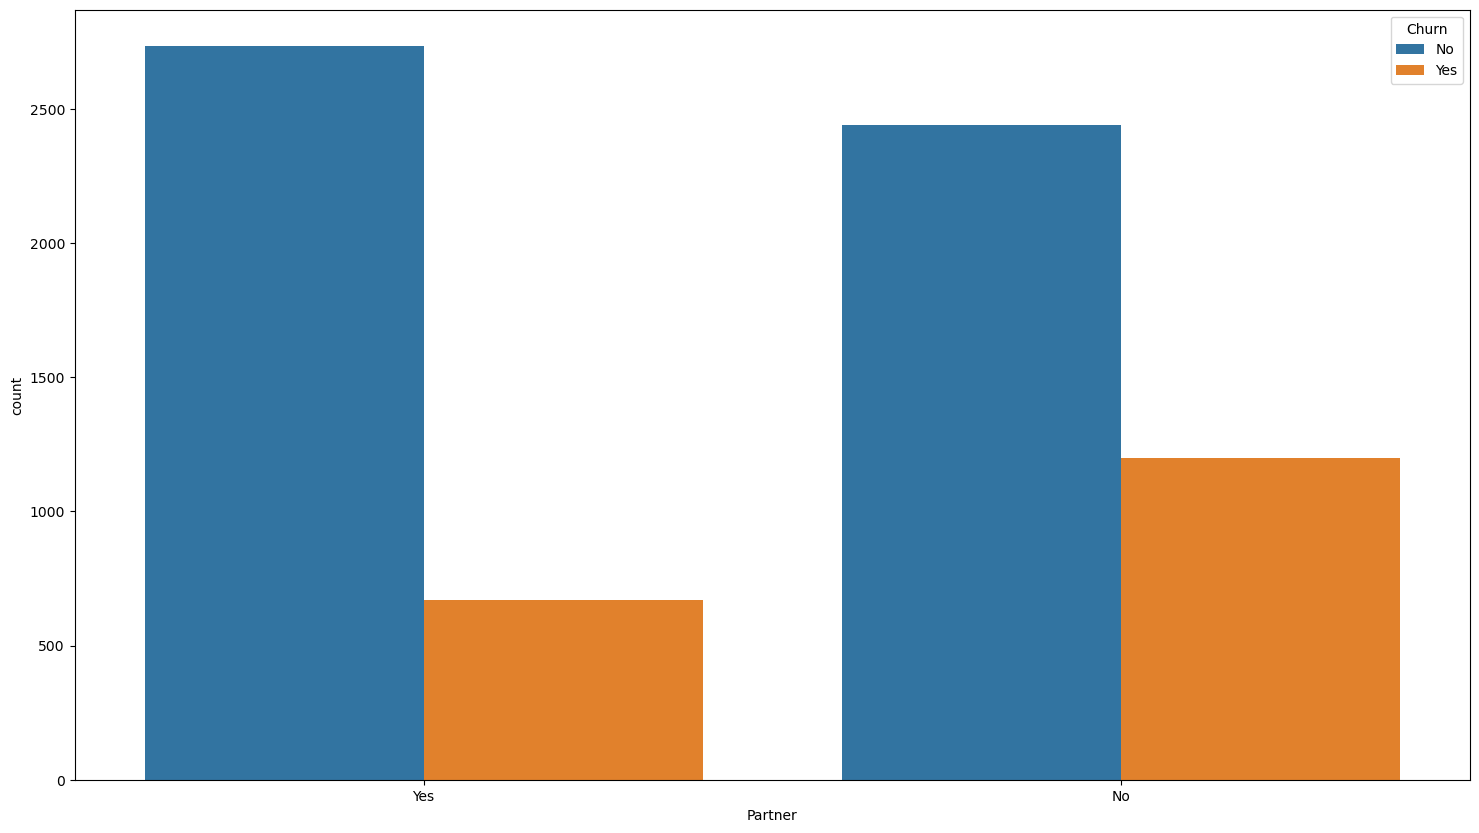

In [59]:
#Churned clients by Partner
plt.figure(figsize=(18, 10))
sns.countplot(x='Partner', hue='Churn', data=df)

In [60]:
dfPartherNo=df.loc[(df["Partner"]=='Yes') & (df['Churn']=='No')]

In [61]:
PartherNoChurn=dfPartherNo.shape[0]

In [62]:
PartherNoChurn

2733

In [63]:
PartherYes=df.loc[(df["Partner"]=='Yes') & (df['Churn']=='Yes')]

In [64]:
PartherYesChurn=PartherYes.shape[0]

In [65]:
PartherYesChurn

669

In [66]:
sumParther = PartherYesChurn + PartherNoChurn

In [67]:
sumParther

3402

In [68]:
partherMean = PartherNoChurn/ (sumParther)*100

In [69]:
partherMean 

80.33509700176367

In [70]:
noPartherYes=df.loc[(df["Partner"]=='No') & (df['Churn']=='Yes')]

In [71]:
noPartherYesChurn=noPartherYes.shape[0]

In [72]:
noPartherYesChurn

1200

In [73]:
noPartherNo=df.loc[(df["Partner"]=='No') & (df['Churn']=='No')]

In [74]:
noPartherNoChurn=noPartherNo.shape[0]

In [75]:
noPartherNoChurn

2441

In [76]:
sumNoParther = noPartherYesChurn + noPartherNoChurn

In [77]:
sumNoParther

3641

In [78]:
nopartherchurnMean =noPartherNoChurn / (sumNoParther)*100

In [79]:
nopartherchurnMean

67.04202142268608

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Partner Analysis</font></h3>
<li>There are currently 3402 customers who are partners of the company, of which 669 have churned, giving an average no churn rate of average no churn rate of 80.33%.
<li> On the other hand, the 3641 customers who are not partners have an average no churn rate of 67.04%.
<li> It can be seen that the churn rate of non-partner customers is much higher than that of partner customers.
</div>

<AxesSubplot:xlabel='Dependents', ylabel='count'>

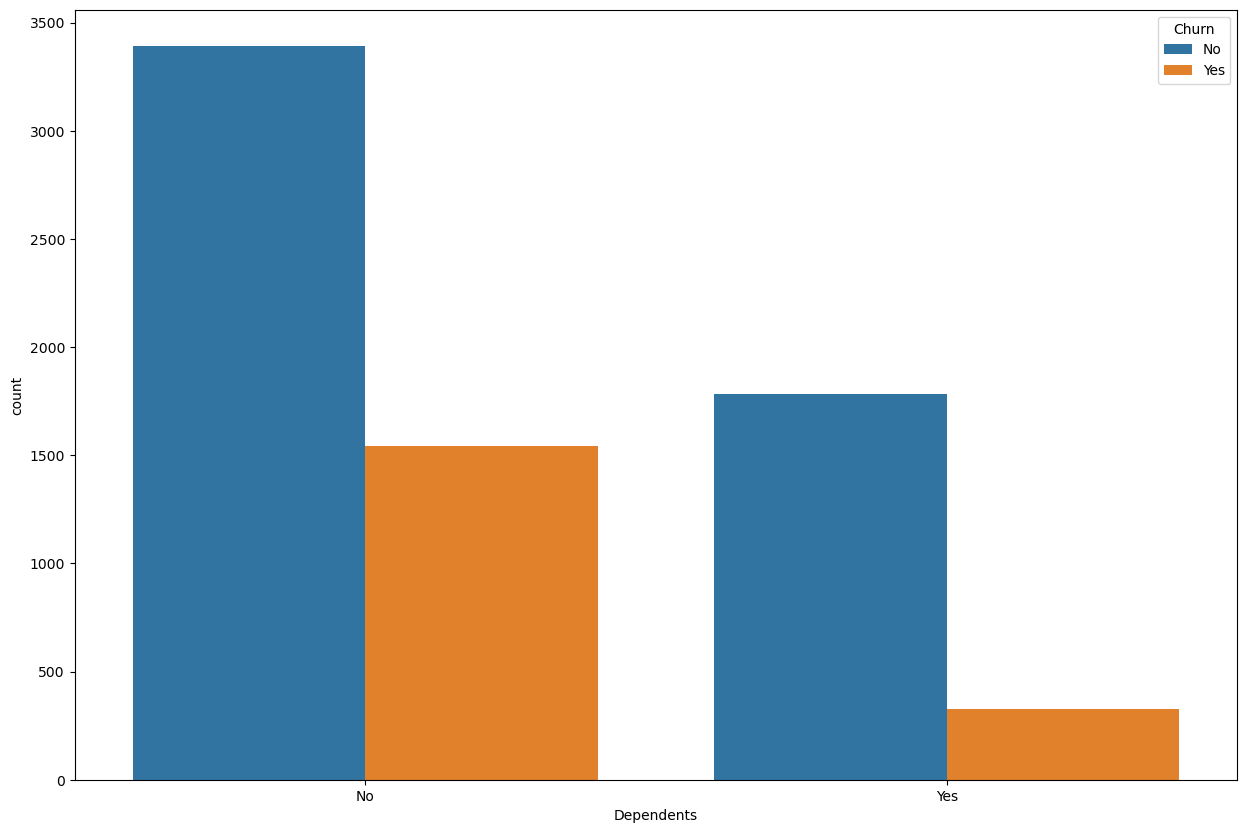

In [80]:
#Churned clients by Dependents
plt.figure(figsize=(15, 10))
sns.countplot(x='Dependents', hue='Churn', data=df)

In [81]:
dfDepentsNo=df.loc[(df["Dependents"]=='Yes') & (df['Churn']=='No')]

In [82]:
DepentsNoChurn=dfDepentsNo.shape[0]

In [83]:
DepentsNoChurn

1784

In [84]:
dfDependentsYes=df.loc[(df["Dependents"]=='Yes') & (df['Churn']=='Yes')]

In [85]:
dfDepentsYesChurn =dfDependentsYes.shape[0]

In [86]:
dfDepentsYesChurn

326

In [87]:
sumDependents = DepentsNoChurn + dfDepentsYesChurn

In [88]:
sumDependents

2110

In [89]:
DependentsMean =DepentsNoChurn / (sumDependents)*100

In [90]:
DependentsMean

84.54976303317535

In [91]:
dfnoDepents=df.loc[(df["Dependents"]=='No') & (df['Churn']=='No')]

In [92]:
noDepentsNoChurn=dfnoDepents.shape[0]

In [93]:
noDepentsNoChurn

3390

In [94]:
dfnoDependentsYes=df.loc[(df["Dependents"]=='No') & (df['Churn']=='Yes')]

In [95]:
noDepentsYesChurn =dfnoDependentsYes.shape[0]

In [96]:
noDepentsYesChurn

1543

In [97]:
sumnoDependents = noDepentsNoChurn + noDepentsYesChurn

In [98]:
sumnoDependents

4933

In [99]:
noDependentsMean =noDepentsNoChurn / (sumnoDependents)*100

In [100]:
noDependentsMean

68.72085951753498

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Dependents Analysis</font></h3>
<li> Of the 2110 customers who make depents, only 326 churn, giving an average no churn rate of 84.54%.
<li> Of the 4933 customers who have no dependents, the average no churn rate is 68.72%.
</div>


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

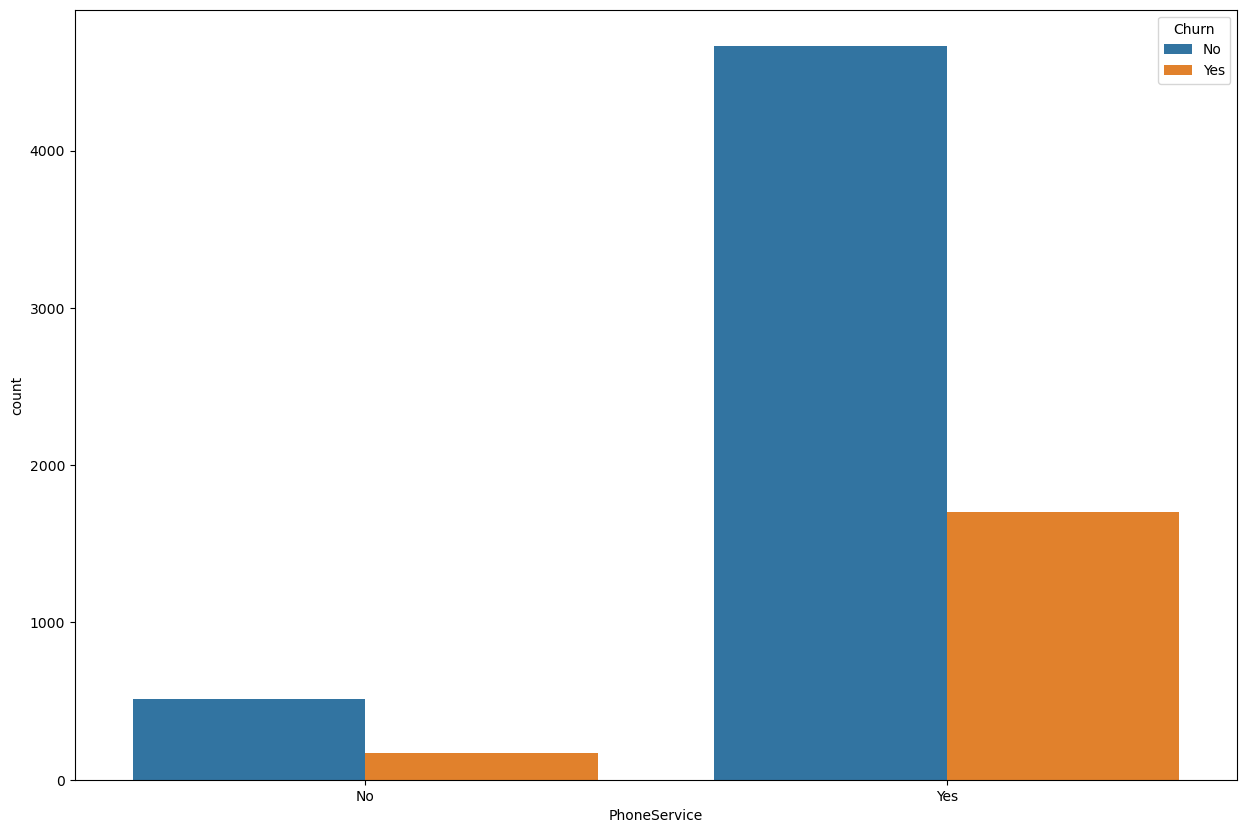

In [101]:
#Churned clients by phoneservice
plt.figure(figsize=(15, 10))
sns.countplot(x='PhoneService', hue='Churn', data=df)

In [102]:
dfnoPhoneServiceNo=df.loc[(df["PhoneService"]=='No') & (df['Churn']=='No')]

In [103]:
noPhoneServiceNoChurn=dfnoPhoneServiceNo.shape[0]

In [104]:
noPhoneServiceNoChurn

512

In [105]:
dfnoPhoneServiceYesChurn=df.loc[(df["PhoneService"]=='No') & (df['Churn']=='Yes')]

In [106]:
noPhoneServiceYesChurn =dfnoPhoneServiceYesChurn.shape[0]

In [107]:
noPhoneServiceYesChurn

170

In [108]:
sumnoPhoneService = noPhoneServiceNoChurn + noPhoneServiceYesChurn

In [109]:
sumnoPhoneService

682

In [110]:
noPhoneServiceMean =noPhoneServiceNoChurn / (sumnoPhoneService)*100

In [111]:
noPhoneServiceMean

75.0733137829912

In [112]:
dfPhoneService=df.loc[(df["PhoneService"]=='Yes') & (df['Churn']=='No')]

In [113]:
PhoneServiceNoChurn=dfPhoneService.shape[0]

In [114]:
PhoneServiceNoChurn

4662

In [115]:
dfPhoneServiceYesChurn=df.loc[(df["PhoneService"]=='Yes') & (df['Churn']=='Yes')]

In [116]:
PhoneServiceYesChurn =dfPhoneServiceYesChurn.shape[0]

In [117]:
PhoneServiceYesChurn

1699

In [118]:
sumPhoneService = PhoneServiceNoChurn + PhoneServiceYesChurn

In [119]:
sumPhoneService

6361

In [120]:
PhoneServiceMean =PhoneServiceNoChurn / (sumPhoneService)*100

In [121]:
PhoneServiceMean

73.29036315044804

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>PhoneService Analysis</font></h3>
<li> Of the 682 customers without PhoneService, 170 customers have churned, giving an average of of 75.07%.
<li> Of the 6361 customers who have PhoneService, 4662 have no churn, giving an average of 73.29% no churn 
</div>



<AxesSubplot:xlabel='InternetService', ylabel='count'>

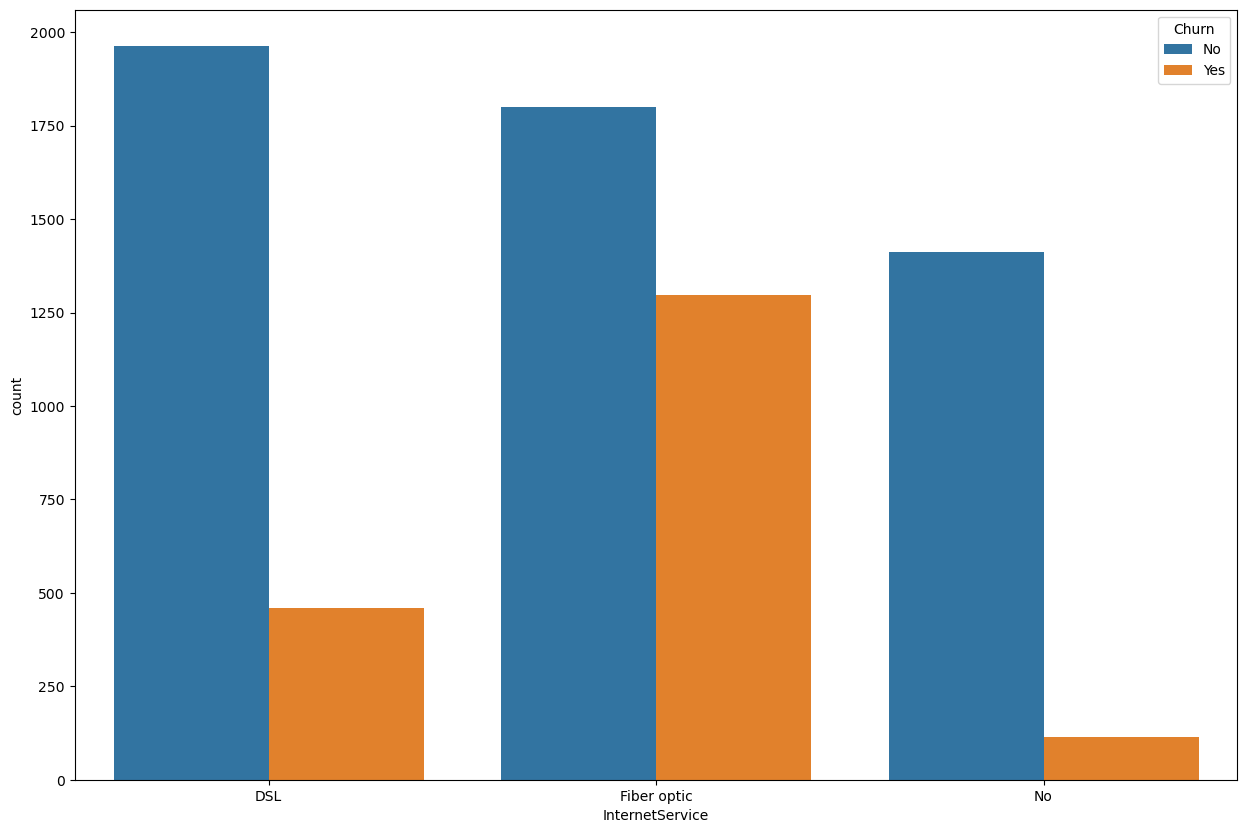

In [122]:
#Churned clients by InternetService
plt.figure(figsize=(15, 10))
sns.countplot(x='InternetService', hue='Churn', data=df)

In [123]:
dfInternetService=df.loc[(df["InternetService"]=="No") & (df['Churn']=='No')]

In [124]:
InternetServiceNoChurn=dfInternetService.shape[0]

In [125]:
InternetServiceNoChurn

1413

In [126]:
dfInternetServiceYes=df.loc[(df["InternetService"]=='No') & (df['Churn']=='Yes')]

In [127]:
InternetServiceYesChurn =dfInternetServiceYes.shape[0]

In [128]:
InternetServiceYesChurn

113

In [129]:
sumInternetService = InternetServiceNoChurn + InternetServiceYesChurn

In [130]:
sumInternetService

1526

In [131]:
InternetServiceMean =InternetServiceNoChurn / (sumInternetService)*100

In [132]:
InternetServiceMean

92.59501965923984

In [133]:
dfInternetServiceDSL=df.loc[(df["InternetService"]=='DSL') & (df['Churn']=='No')]

In [134]:
InternetServiceDSLNoChurn=dfInternetServiceDSL.shape[0]

In [135]:
InternetServiceDSLNoChurn

1962

In [136]:
dfInternetServiceDSLYes=df.loc[(df["InternetService"]=='DSL') & (df['Churn']=='Yes')]

In [137]:
InternetServiceDSLYesChurn =dfInternetServiceDSLYes.shape[0]

In [138]:
InternetServiceDSLYesChurn

459

In [139]:
sumInternetServiceDSL = InternetServiceDSLNoChurn + InternetServiceDSLYesChurn

In [140]:
sumInternetServiceDSL

2421

In [141]:
InternetServiceDSLMean =InternetServiceDSLNoChurn / (sumInternetServiceDSL)*100

In [142]:
InternetServiceDSLMean

81.04089219330855

In [143]:
dfInternetServiceFiber=df.loc[(df["InternetService"]=='Fiber optic') & (df['Churn']=='No')]

In [144]:
InternetServiceFiberNoChurn=dfInternetServiceFiber.shape[0]

In [145]:
InternetServiceFiberNoChurn

1799

In [146]:
dfInternetServiceFiberYes=df.loc[(df["InternetService"]=='Fiber optic') & (df['Churn']=='Yes')]

In [147]:
InternetServiceFiberYesChurn =dfInternetServiceFiberYes.shape[0]

In [148]:
InternetServiceFiberYesChurn

1297

In [149]:
sumInternetServiceFiber = InternetServiceFiberNoChurn + InternetServiceFiberYesChurn

In [150]:
sumInternetServiceFiber

3096

In [151]:
InternetServiceFiberMean =InternetServiceFiberNoChurn / (sumInternetServiceFiber)*100

In [152]:
InternetServiceFiberMean

58.10723514211886

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>InternetService Analysis</font></h3>
<li> Based on the data provided, there are a total of 7043 customers, of which 2421 have DSL services, 3096 customers have fibre and 1526 have no internet service.
<li> Of the customers who have DSL service, the average no churn rate is 81.04%, while of those who do not have Fibre Optic service, the average no churn rate is 58.10%. On the other hand, 92.59% of those who do not have Internet service do so.
<li> Clearly, more attention should be paid to fibre optic subscribers, as they have a higher average churn rate.
</div>

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

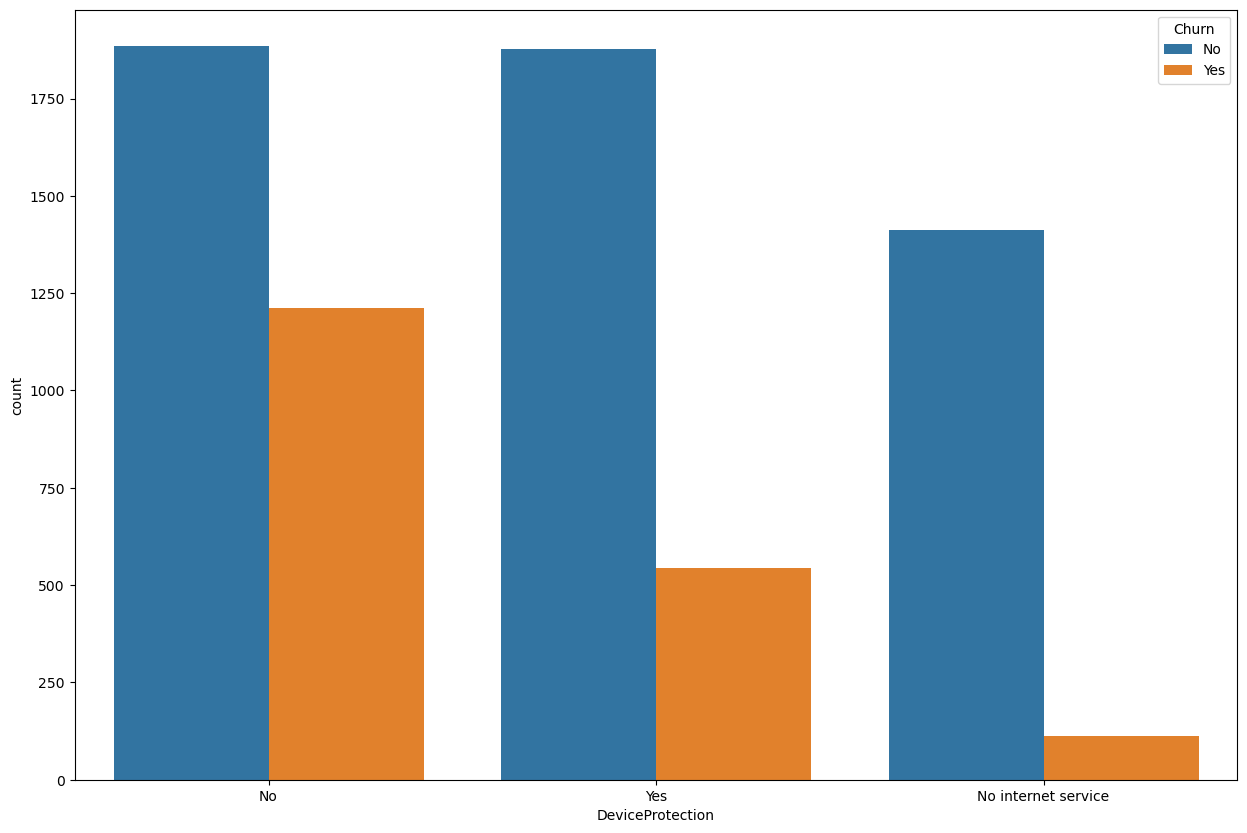

In [153]:
#Churned clients by DeviceProtection
plt.figure(figsize=(15, 10))
sns.countplot(x='DeviceProtection', hue='Churn', data=df)

In [154]:
dfnoDeviceProtectionNo=df.loc[(df["DeviceProtection"]=='No') & (df['Churn']=='No')]

In [155]:
noDeviceProtectionNoChurn=dfnoDeviceProtectionNo.shape[0]

In [156]:
noDeviceProtectionNoChurn

1884

In [157]:
dfnoDeviceProtectionNoYes=df.loc[(df["DeviceProtection"]=='No') & (df['Churn']=='Yes')]

In [158]:
noDeviceProtectionYesChurn =dfnoDeviceProtectionNoYes.shape[0]

In [159]:
noDeviceProtectionYesChurn

1211

In [160]:
sumnoDeviceProtection =noDeviceProtectionNoChurn + noDeviceProtectionYesChurn

In [161]:
sumnoDeviceProtection

3095

In [162]:
noDeviceProtectionMean =noDeviceProtectionNoChurn/ (sumnoDeviceProtection)*100

In [163]:
noDeviceProtectionMean 

60.872374798061394

In [164]:
dfDeviceProtectionNointernet=df.loc[(df["DeviceProtection"]=='No internet service') & (df['Churn']=='No')]

In [165]:
DeviceProtectionNointernetNoChurn=dfDeviceProtectionNointernet.shape[0]

In [166]:
DeviceProtectionNointernetNoChurn

1413

In [167]:
dfDeviceProtectionNointernetYes=df.loc[(df["DeviceProtection"]=='No internet service') & (df['Churn']=='Yes')]

In [168]:
DeviceProtectionNointernetYesChurn =dfDeviceProtectionNointernetYes.shape[0]

In [169]:
DeviceProtectionNointernetYesChurn

113

In [170]:
sumDeviceProtectionNointernet =DeviceProtectionNointernetNoChurn + DeviceProtectionNointernetYesChurn

In [171]:
sumDeviceProtectionNointernet

1526

In [172]:
DeviceProtectionNointernetMean =DeviceProtectionNointernetNoChurn/ (sumDeviceProtectionNointernet)*100

In [173]:
DeviceProtectionNointernetMean

92.59501965923984

In [174]:
dfDeviceProtection=df.loc[(df["DeviceProtection"]=='Yes') & (df['Churn']=='No')]

In [175]:
DeviceProtectionNoChurn=dfDeviceProtection.shape[0]

In [176]:
DeviceProtectionNoChurn

1877

In [177]:
dfDeviceProtectionYes=df.loc[(df["DeviceProtection"]=='Yes') & (df['Churn']=='Yes')]

In [178]:
DeviceProtectionYesChurn =dfDeviceProtectionYes.shape[0]

In [179]:
DeviceProtectionYesChurn

545

In [180]:
sumDeviceProtection =DeviceProtectionNoChurn + DeviceProtectionYesChurn

In [181]:
sumDeviceProtection

2422

In [182]:
DeviceProtectionMean =DeviceProtectionNoChurn/ (sumDeviceProtection)*100

In [183]:
DeviceProtectionMean 

77.49793559042114

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Device Protection Analysis</font></h3>
<li> Regarding the device protection factor, there are 3095 devices that have no DeviceProtection, giving an average no churn rate of 60.87%.
<li>1,526 customers have no Internet service, of which 113 have churned, giving an average no churn rate of  92.59% churn rate.
<li> Of the 2422 customers with device protection, 1877 have not churned and 545 have churned, giving an average no churn rate of 77.49%. 
<li>The highest average churn rate belongs to those who do not have device protection, the company should focus on this area to avoid losing customers.
</div>

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

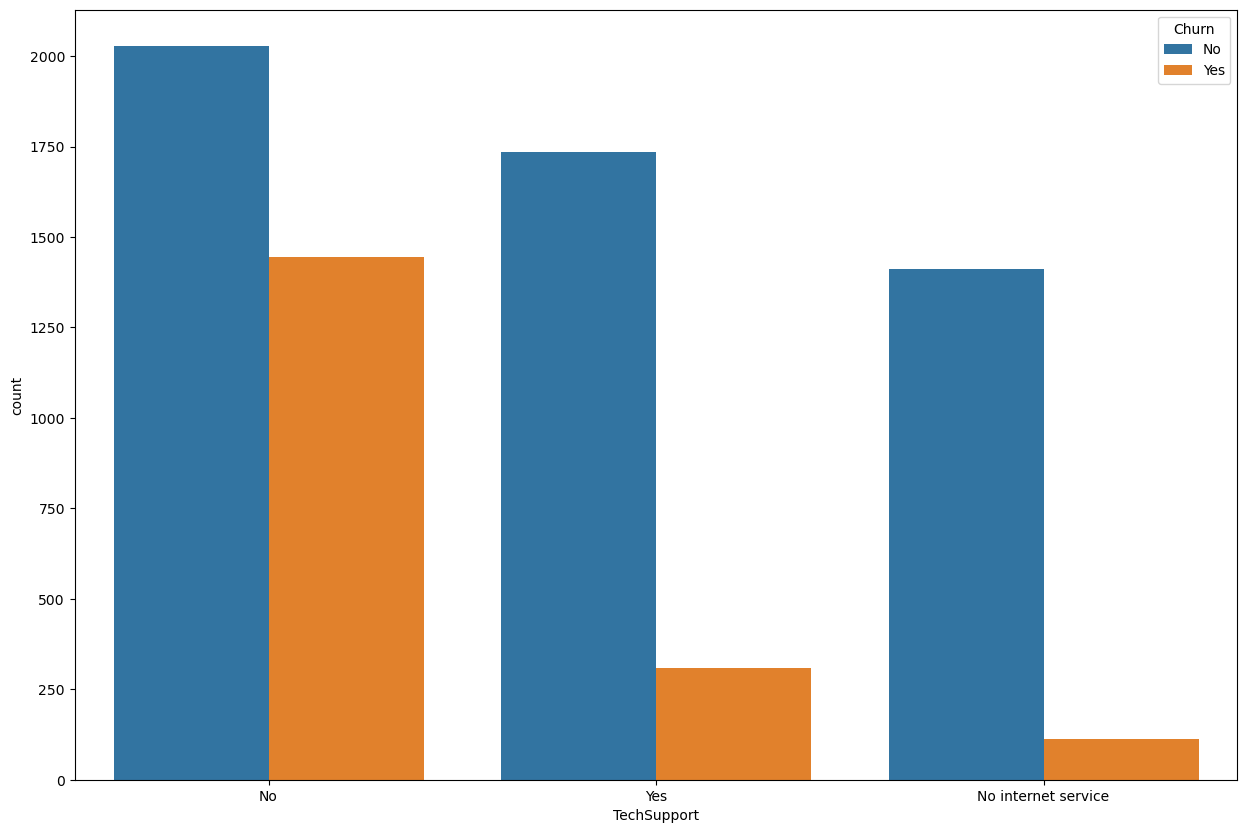

In [184]:
#Churned clients by TechSupport
plt.figure(figsize=(15, 10))
sns.countplot(x='TechSupport', hue='Churn', data=df)

In [185]:
dfTechSupport=df.loc[(df["TechSupport"]=='Yes') & (df['Churn']=='No')]

In [186]:
TechSupportNoChurn=dfTechSupport.shape[0]

In [187]:
TechSupportNoChurn

1734

In [188]:
dfTechSupportYesChurn=df.loc[(df["TechSupport"]=='Yes') & (df['Churn']=='Yes')]

In [189]:
TechSupportYesChurn =dfTechSupportYesChurn.shape[0]

In [190]:
TechSupportYesChurn

310

In [191]:
sumTechSupport =TechSupportNoChurn + TechSupportYesChurn

In [192]:
sumTechSupport 

2044

In [193]:
TechSupportnMean =TechSupportNoChurn/ (sumTechSupport )*100

In [194]:
TechSupportnMean

84.83365949119374

In [195]:
dfTechSupportNointernetnoChurn = df.loc[(df["TechSupport"]=='No internet service') & (df['Churn']=='No')]

In [196]:
TechSupportNointernetNoChurn = dfTechSupportNointernetnoChurn.shape[0]

In [197]:
TechSupportNointernetNoChurn

1413

In [198]:
dfTechSupportNointernetYesChurn=df.loc[(df["TechSupport"]=='No internet service') & (df['Churn']=='Yes')]

In [199]:
TechSupportNointernetYesChurn =dfTechSupportNointernetYesChurn.shape[0]

In [200]:
TechSupportNointernetYesChurn

113

In [201]:
sumTechSupportNointernet =TechSupportNointernetNoChurn  + TechSupportNointernetYesChurn

In [202]:
sumTechSupportNointernet

1526

In [203]:
TechSupportNointernetMean =TechSupportNointernetNoChurn/ (sumTechSupportNointernet )*100

In [204]:
TechSupportNointernetMean

92.59501965923984

In [205]:
dfnoTechSupportNoChurn=df.loc[(df["TechSupport"]=='No') & (df['Churn']=='No')]

In [206]:
noTechSupportNoChurn=dfnoTechSupportNoChurn.shape[0]

In [207]:
noTechSupportNoChurn

2027

In [208]:
dfnoTechSupportYesChurn=df.loc[(df["TechSupport"]=='No') & (df['Churn']=='Yes')]

In [209]:
noTechSupportYesChurn =dfnoTechSupportYesChurn.shape[0]

In [210]:
noTechSupportYesChurn

1446

In [211]:
sumnoTechSupport =noTechSupportNoChurn + noTechSupportYesChurn

In [212]:
sumnoTechSupport 

3473

In [213]:
noTechSupportnMean =noTechSupportNoChurn/ (sumnoTechSupport )*100

In [214]:
noTechSupportnMean

58.36452634609848

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>TechSupport Analysis</font></h3>
<li> Of the 7043 customers, 2044 subscribed to the TechSupport service, 1734 did not churn, 310 have churned, giving an average churn rate of 84.83%.
<li> 1526 of the company's customers do not have Internet service, of which 1413 have not churned and 113 have churned, giving an average no churn rate of 92%.
<li> 3473 customers have not taken up TechSupport, 1446 customers have churn on record
giving an average no churn rate of 58.36%.
<li> Customers who have not subscribed to TechSupport have a high average churn rate, so they are more likely to churn.
</div>

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

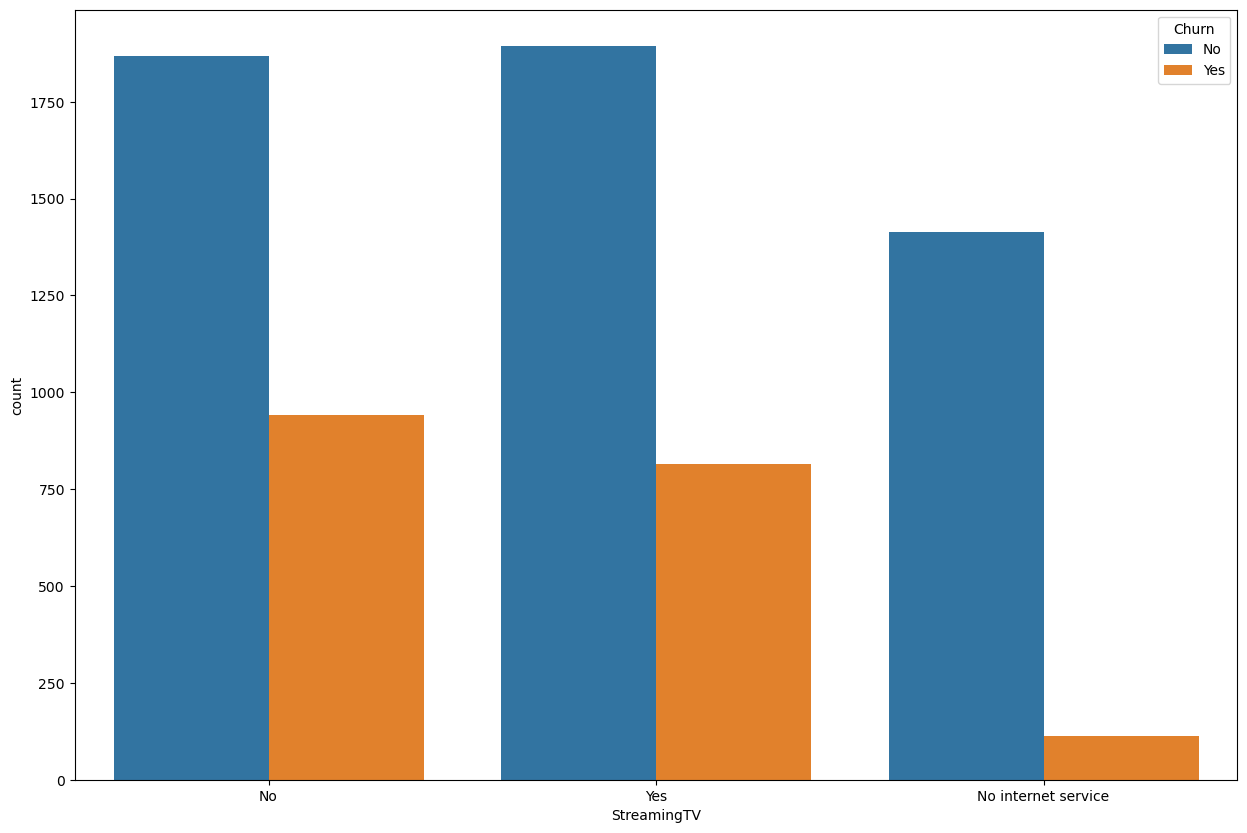

In [215]:
#Churned clients by StreamingTV
plt.figure(figsize=(15, 10))
sns.countplot(x='StreamingTV', hue='Churn', data=df)

In [216]:
dfnoStreamingTVChurn=df.loc[(df["StreamingTV"]=='No') & (df['Churn']=='No')]

In [217]:
noStreamingTVChurn=dfnoStreamingTVChurn.shape[0]

In [218]:
noStreamingTVChurn

1868

In [219]:
dfnoStreamingTVYesChurn=df.loc[(df["StreamingTV"]=='No') & (df['Churn']=='Yes')]

In [220]:
noStreamingTVYesChurn =dfnoStreamingTVYesChurn.shape[0]

In [221]:
noStreamingTVYesChurn

942

In [222]:
sumnoStreamingTV =noStreamingTVChurn + noStreamingTVYesChurn

In [223]:
sumnoStreamingTV

2810

In [224]:
noStreamingTVMean =noStreamingTVChurn/ (sumnoStreamingTV )*100

In [225]:
noStreamingTVMean

66.47686832740214

In [226]:
dfStreamingTVNointernetNoChurn=df.loc[(df["StreamingTV"]=='No internet service') & (df['Churn']=='No')]

In [227]:
StreamingTVNointernetNoChurn=dfStreamingTVNointernetNoChurn.shape[0]

In [228]:
StreamingTVNointernetNoChurn

1413

In [229]:
dfStreamingTVNointernetYesChurn=df.loc[(df["StreamingTV"]=='No internet service') & (df['Churn']=='Yes')]

In [230]:
StreamingTVNointernetYesChurn=dfStreamingTVNointernetYesChurn.shape[0]

In [231]:
StreamingTVNointernetYesChurn

113

In [232]:
sumnoStreamingTVNointernet =StreamingTVNointernetNoChurn + StreamingTVNointernetYesChurn

In [233]:
sumnoStreamingTVNointernet

1526

In [234]:
StreamingTVNointernetMean =StreamingTVNointernetNoChurn/ (sumnoStreamingTVNointernet)*100

In [235]:
StreamingTVNointernetMean

92.59501965923984

In [236]:
dfStreamingTVNoChurn=df.loc[(df["StreamingTV"]=='Yes') & (df['Churn']=='No')]

In [237]:
StreamingTVNoChurn=dfStreamingTVNoChurn.shape[0]

In [238]:
StreamingTVNoChurn

1893

In [239]:
dfStreamingTVYesChurn=df.loc[(df["StreamingTV"]=='Yes') & (df['Churn']=='Yes')]

In [240]:
StreamingTVYesChurn =dfStreamingTVYesChurn.shape[0]

In [241]:
StreamingTVYesChurn

814

In [242]:
sumStreamingTV =StreamingTVNoChurn + StreamingTVYesChurn

In [243]:
sumStreamingTV 

2707

In [244]:
StreamingTVMean =StreamingTVNoChurn/ (sumStreamingTV  )*100

In [245]:
StreamingTVMean

69.9298115995567

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>StreamingTV Analysis</font></h3>
<li>Regarding the StreamingTV service, 2810 customers have not subscribed to this service. Of these, 1868 have no churn, giving an average of 66.47% no churn.
<li> On the other hand, the 1526 customers who do not have an Internet service have an average of 92.59% of no churn.
<li> Finally, the 2707 customers who have subscribed to the StreamingTV service have an average no churn rate of 69.92%.
<li>Both those who have subscribed to the StreamingTV service and those who have not have a very high average churn rate, so strategies to retain these customers should be considered.
</div>


</div>

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 100% 50%;background-size: 150% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Model Building</span></b> </div>


In [246]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [247]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [248]:
#Standardizing the data format
#Converting column and string names to lowercase, and replacing whitespace with underscores.


In [249]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [250]:
df.churn = (df.churn == 'yes').astype(int)

In [251]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [252]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 7043
Number of Columns 21


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [254]:
df.describe(include='all')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,7590-vhveg,male,NaN,no,no,NaN,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,NaN,NaN,NaN
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,0.265370
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,0.441561
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,1.000000


In [255]:
from sklearn.model_selection import train_test_split

In [256]:
#Splitting the dataset into training and testing sets

In [257]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [258]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [259]:
#Creating response variable
y_train = df_train.churn.values
y_val = df_val.churn.values

In [260]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [261]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [262]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [263]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [264]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [265]:
#Creating churn rate response variable
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [266]:
female_mean / global_mean

1.0253955354648652

In [267]:
male_mean / global_mean

0.9749802969838747

In [268]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [269]:
partner_yes / global_mean

0.7594724924338315

In [270]:
partner_no / global_mean

1.2216593879412643

In [271]:
#The objective of this line of code is to create a churn rate response variable based on the gender of customers
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [272]:
from IPython.display import display

In [273]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [274]:
#The objective of this line of code is to calculate the churn rate response variable for each categorical variable
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [275]:
from sklearn.metrics import mutual_info_score

In [276]:
#The objective of this line of code is to calculate the mutual information (MI) score for each categorical variable 
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [277]:
#The objective of this line of code is to calculate the correlation between the numerical variables
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [278]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [279]:
from sklearn.feature_extraction import DictVectorizer

In [280]:
#Create a dictionary containing the training dataset's categorical and numeric variable values.
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [281]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [282]:
# Create a DictVectorizer (dv) object and fit it to the training data set. 
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [283]:
X_train = dv.transform(train_dict)

In [284]:
X_train.shape

(3774, 45)

In [285]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [286]:
from sklearn.linear_model import LogisticRegression

In [287]:
#Create a LogisticRegression object (model). Fit it to the training data set.
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [288]:
LogisticRegression(random_state=1, 

solver

='liblinear')

LogisticRegression(random_state=1, solver='liblinear')

In [289]:
#Transformation of the validation data (df_val) into a format that can be used by the previously trained model.
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [290]:
model.predict_proba(X_val)

array([[0.76509203, 0.23490797],
       [0.73114243, 0.26885757],
       [0.68054933, 0.31945067],
       ...,
       [0.9427494 , 0.0572506 ],
       [0.38477113, 0.61522887],
       [0.93872737, 0.06127263]])

In [291]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.23490797, 0.26885757, 0.31945067, ..., 0.0572506 , 0.61522887,
       0.06127263])

In [292]:
churn = y_pred > 0.5

In [293]:
(y_val == churn).mean()

0.8016129032258065

In [294]:
model.intercept_[0]

-0.121988402285897

In [295]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [296]:
#Obtain feature names of the transformed dataset
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges']

In [297]:
#Use the 'liblinear' solver and random state 1 to create a logistic regression model.
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [298]:
model_small.intercept_[0]

-0.6384442006590022

In [299]:
#Transform the validation data (df_val[subset]) into a format that is suitable for use by the previously created logistic regression model (model_small).
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [300]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [301]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [302]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.07332403595205103

In [303]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [304]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [305]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321645264352351